In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [10]:
df = pd.read_csv('linear_regression2.csv', header= None)
df.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [11]:
df.isnull().sum()

0    0
1    0
2    0
dtype: int64

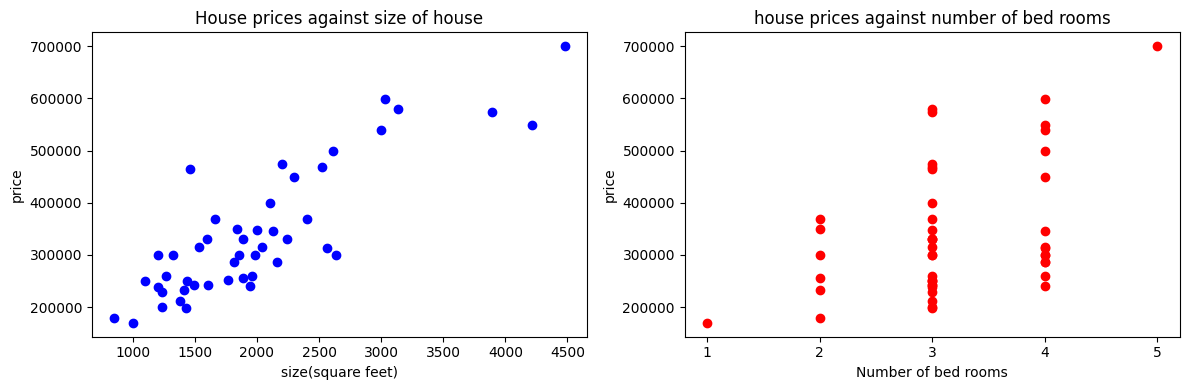

In [18]:
fig, axes = plt.subplots( figsize = (12,4), nrows = 1, ncols =2)
axes[0].scatter(df[0], df[2], color = 'b')
axes[0].set_xlabel('size(square feet)')
axes[0].set_ylabel('price')
axes[0].set_title('House prices against size of house')
axes[1].scatter(df[1],df[2], color = 'r')
axes[1].set_xlabel('Number of bed rooms')
axes[1].set_ylabel('price')
axes[1].set_xticks(np.arange(1,6,step=1))
axes[1].set_title('house prices against number of bed rooms')
plt.tight_layout()